### Dataset Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
  
# fetch dataset 
data = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)
  
# metadata 
print(data.metadata) 
  
# variable information 
print(data.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [3]:
# Display the first 5 rows of the dataset
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<Axes: xlabel='Diagnosis', ylabel='count'>

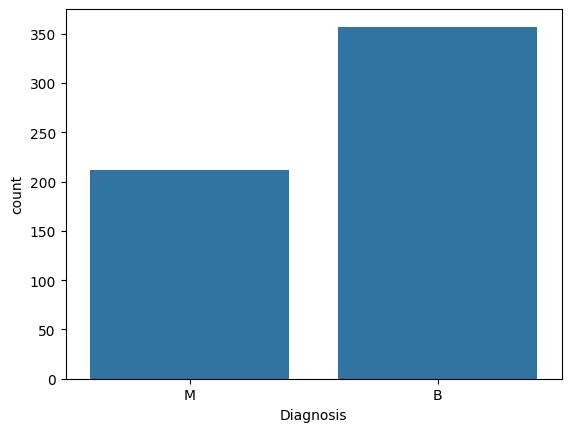

In [4]:
import seaborn as sns

# Show distribution of target variable "Diagnosis"
sns.countplot(data=df, x="Diagnosis")

In [5]:
# convert the target variable to binary
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

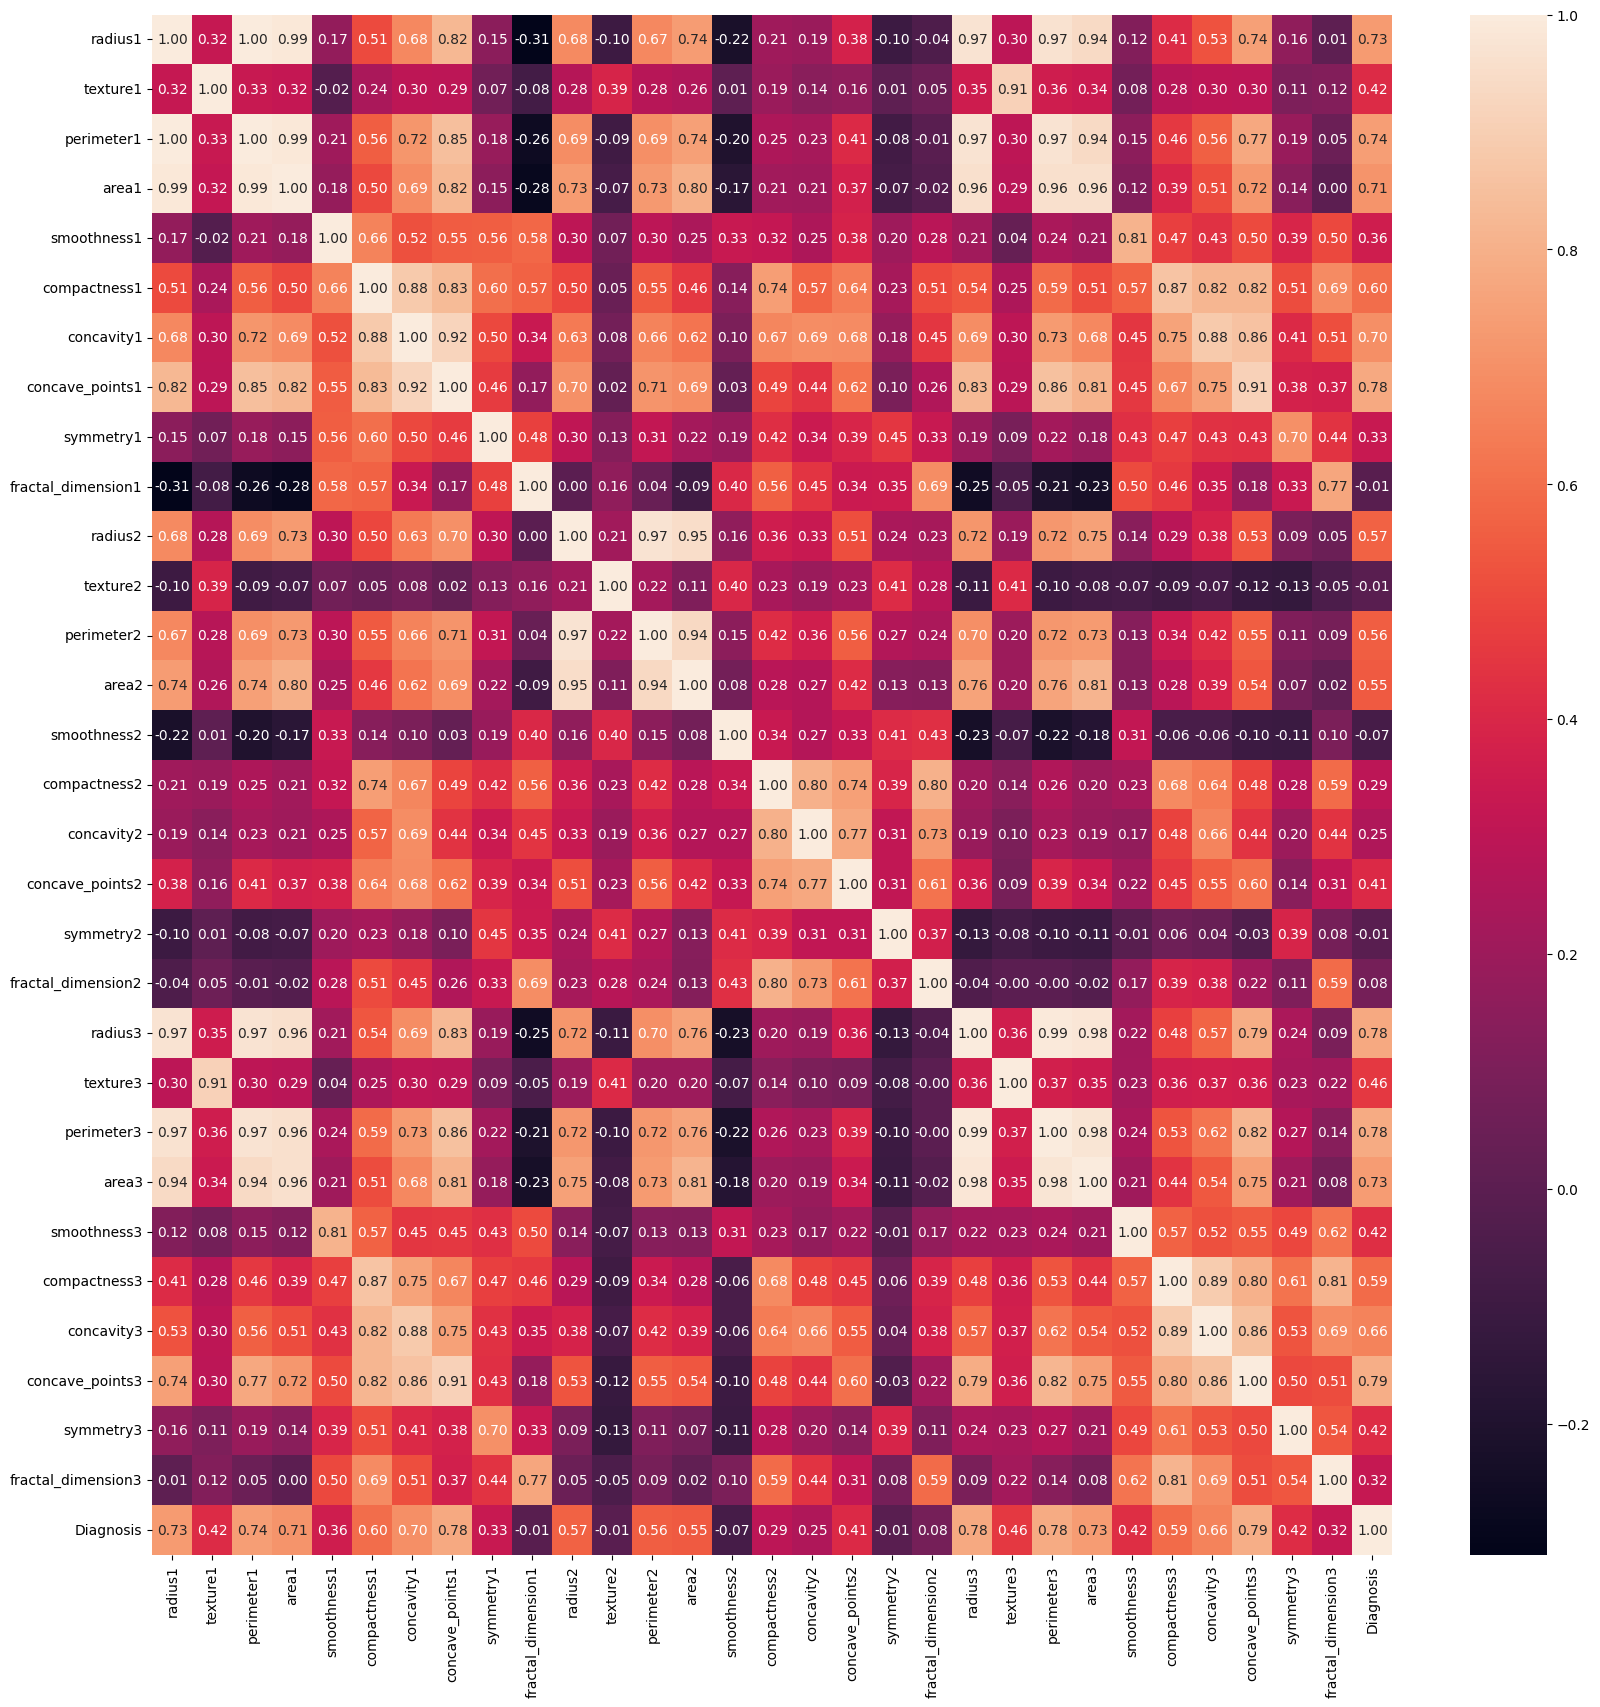

In [6]:
# This function will display the correlation matrix of the dataset
def print_corr_matrix(df):
    correlation_matrix = df.corr()

    # Display the correlation matrix as a graph using seaborn
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.show()

print_corr_matrix(df)

### Point-Biserial Correlations

The point-biserial correlation is a measure of the strength and direction of the association that exists between one continuous variable and one binary variable. It is a special case of the Pearson correlation coefficient, which is used when one of the variables is dichotomous (binary) and the other is continuous.

In [75]:
import pandas as pd
from scipy.stats import pointbiserialr

# this function calculates the point-biserial correlation between the target column and all other columns
def point_biserial_correlation(df, target_column, threshold):

    # Calculate point-biserial correlation
    correlations = {}
    for column in df.columns:
        if column != target_column:
            correlations[column] = round(pointbiserialr(df[target_column], df[column])[0], 2)

    # Print correlations
    print("Correlation with Diagnosis:")
    for feature, corr in correlations.items():
        print(f"{feature}: {corr}")

    # Apply threshold
    selected_features = [feature for feature, corr in correlations.items() if abs(corr) >= threshold]
    print(f"Selected features: {selected_features}")

    # Drop columns that are not selected and return the new DataFrame
    df_filtered = df[selected_features].copy()

    # Add the target column to the new DataFrame
    df_filtered.loc[:, target_column] = df[target_column]
    return df_filtered

# Select features with a correlation of at least 0.3
df_filtered = point_biserial_correlation(df, 'Diagnosis', 0.4)
df_filtered.info()

Correlation with Diagnosis:
radius1: 0.73
texture1: 0.42
perimeter1: 0.74
area1: 0.71
smoothness1: 0.36
compactness1: 0.6
concavity1: 0.7
concave_points1: 0.78
symmetry1: 0.33
fractal_dimension1: -0.01
radius2: 0.57
texture2: -0.01
perimeter2: 0.56
area2: 0.55
smoothness2: -0.07
compactness2: 0.29
concavity2: 0.25
concave_points2: 0.41
symmetry2: -0.01
fractal_dimension2: 0.08
radius3: 0.78
texture3: 0.46
perimeter3: 0.78
area3: 0.73
smoothness3: 0.42
compactness3: 0.59
concavity3: 0.66
concave_points3: 0.79
symmetry3: 0.42
fractal_dimension3: 0.32
Selected features: ['radius1', 'texture1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'concave_points2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---

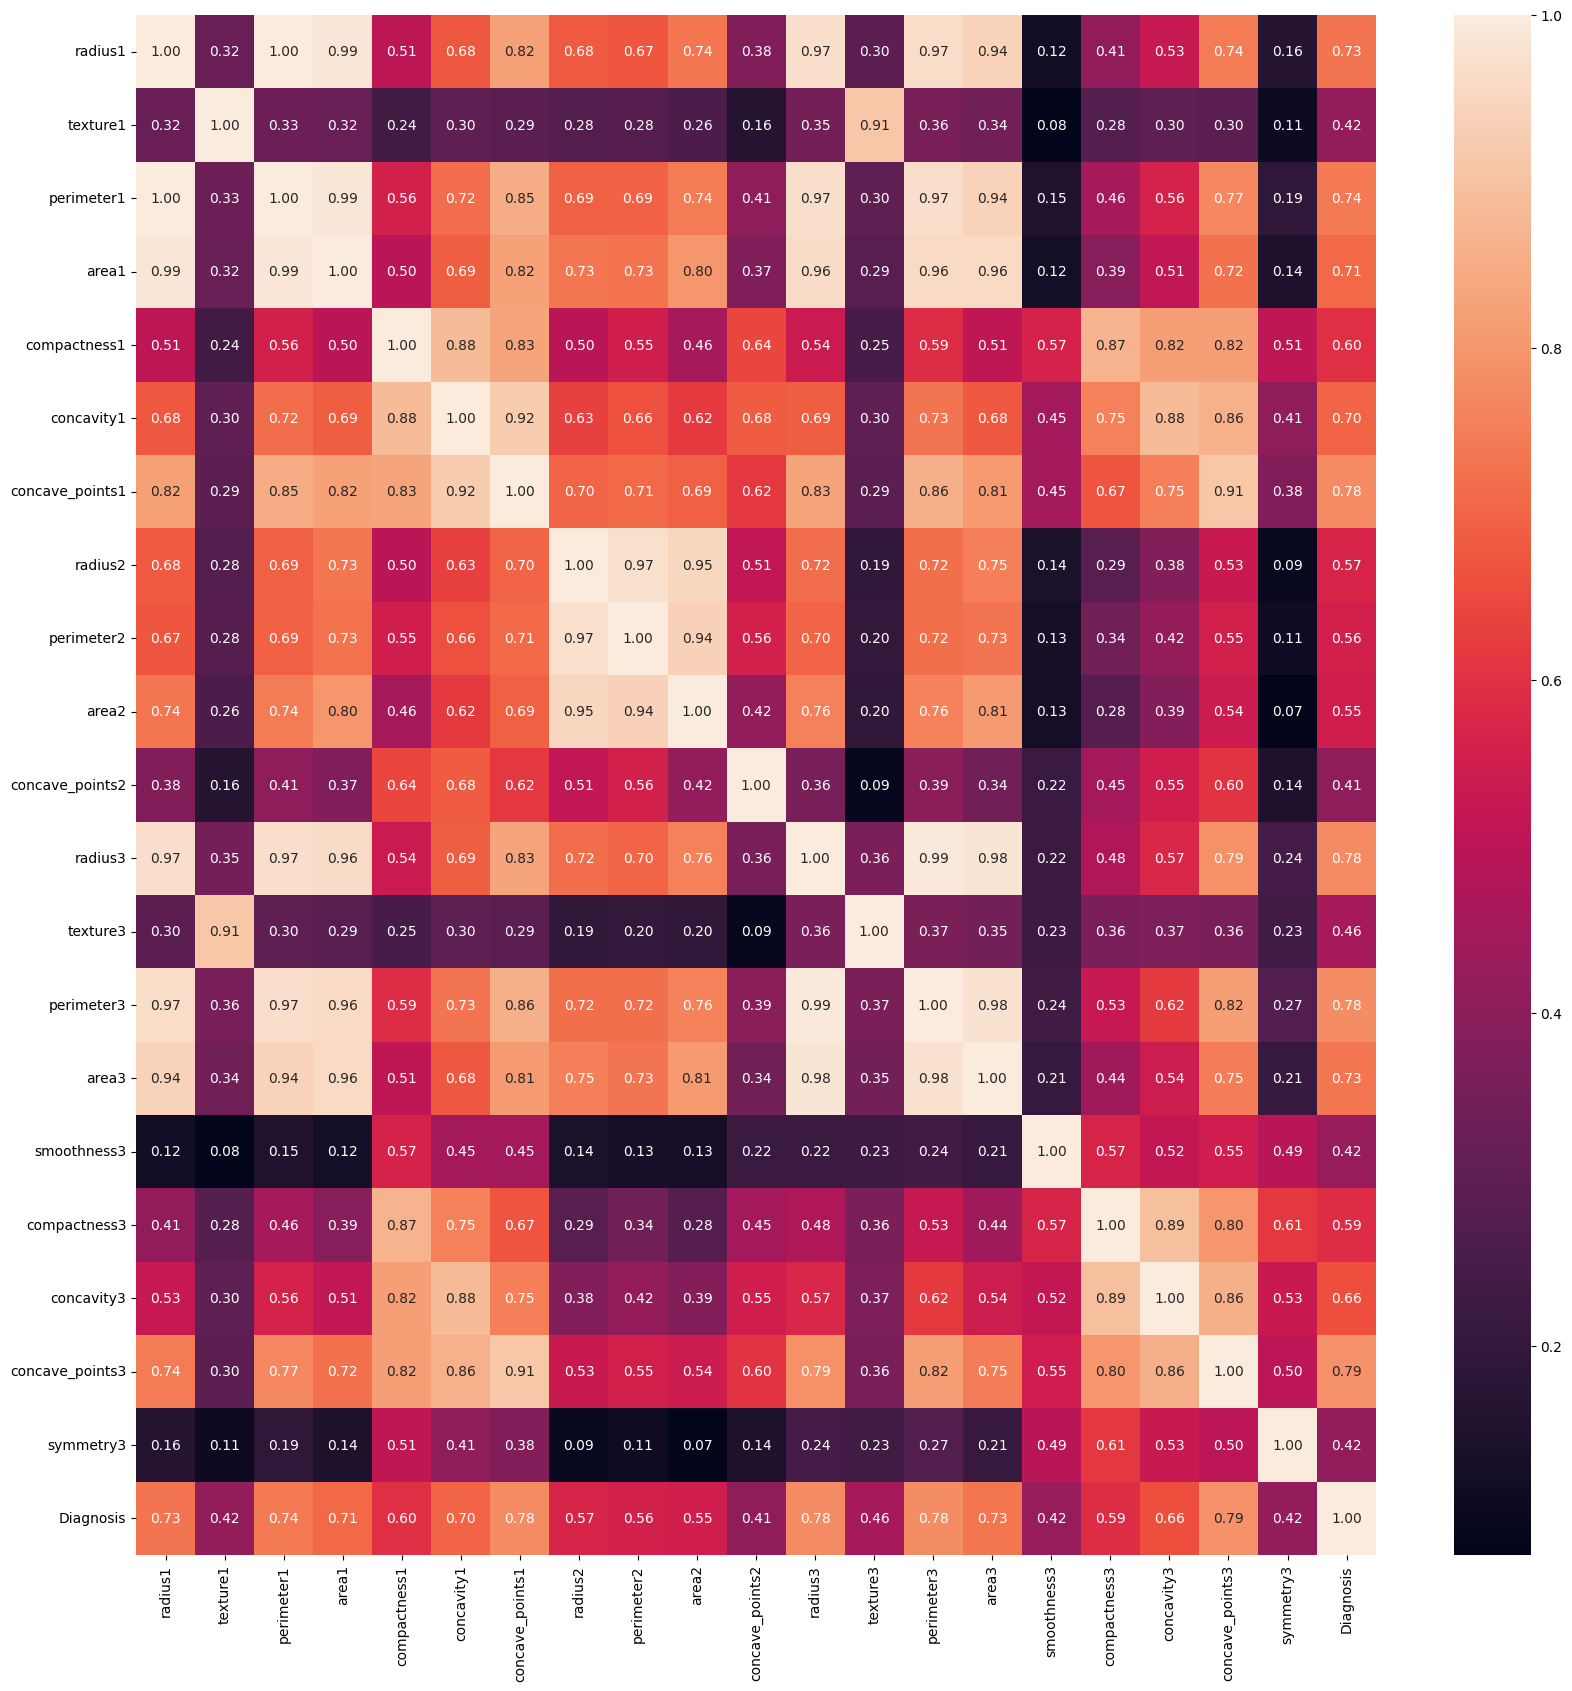

In [76]:
print_corr_matrix(df_filtered)

### Clustering

**K-means Clustering** is a popular clustering method used to group data points into K distinct clusters based on feature similarity.

1. Initialize:
* Randomly select K points as the initial cluster centroids.

2. Assign Clusters:
* Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).

3. Update Centroids:
* Compute the new centroid of each cluster by averaging the positions of all data points assigned to it.

4. Iterate:
* Repeat the assignment and update steps until the centroids stabilize (i.e., no significant change) or a maximum number of iterations is reached.

5. Output:
* The final cluster assignments and centroids.

   radius1  texture1  perimeter1   area1  compactness1  concavity1  \
0    17.99     10.38      122.80  1001.0       0.27760      0.3001   
1    20.57     17.77      132.90  1326.0       0.07864      0.0869   
2    19.69     21.25      130.00  1203.0       0.15990      0.1974   
3    11.42     20.38       77.58   386.1       0.28390      0.2414   
4    20.29     14.34      135.10  1297.0       0.13280      0.1980   

   concave_points1  radius2  perimeter2   area2  ...  perimeter3   area3  \
0          0.14710   1.0950       8.589  153.40  ...      184.60  2019.0   
1          0.07017   0.5435       3.398   74.08  ...      158.80  1956.0   
2          0.12790   0.7456       4.585   94.03  ...      152.50  1709.0   
3          0.10520   0.4956       3.445   27.23  ...       98.87   567.7   
4          0.10430   0.7572       5.438   94.44  ...      152.20  1575.0   

   smoothness3  compactness3  concavity3  concave_points3  symmetry3  \
0       0.1622        0.6656      0.7119          

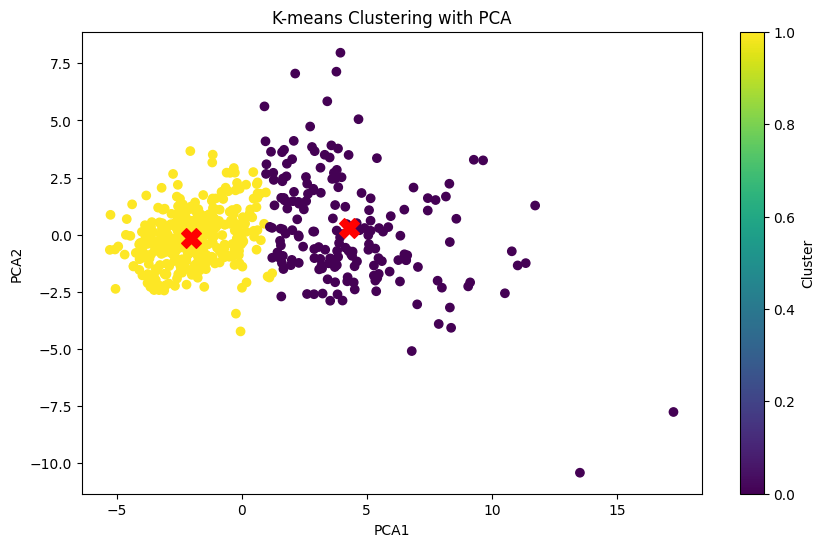

     radius1   texture1  perimeter1        area1  compactness1  concavity1  \
0  17.810109  21.453374  118.199521  1022.992810      0.159815    0.180412   
1  12.395321  18.272083   79.633248   481.775733      0.078252    0.045715   

   concave_points1   radius2  perimeter2      area2  concave_points2  \
0         0.095087  0.655311    4.735342  81.613983         0.016453   
1         0.027207  0.287535    1.986965  20.925202         0.009606   

     radius3   texture3  perimeter3        area3  smoothness3  compactness3  \
0  21.539974  28.909306  145.075255  1488.810006     0.145800       0.40476   
1  13.790423  24.157226   89.477864   594.543615     0.126052       0.18349   

   concavity3  concave_points3  symmetry3  
0    0.489612         0.191499   0.325487  
1    0.169938         0.078445   0.273422  


In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare the data (excluding the target column for clustering)
X = df_filtered.drop(columns=['Diagnosis'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add the PCA components to the DataFrame
X['PCA1'] = pca_data[:, 0]
X['PCA2'] = pca_data[:, 1]
X['Cluster'] = clusters

# Extract cluster centroids in PCA space
centroids = kmeans.cluster_centers_

# Print the DataFrame with cluster labels and PCA components
print(X.head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['PCA1'], X['PCA2'], c=X['Cluster'], cmap='viridis')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster centroids in the original feature space
centroids_original = scaler.inverse_transform(pca.inverse_transform(centroids))
centroids_df = pd.DataFrame(centroids_original, columns=X.columns[:-3])
print(centroids_df)

### Understand PCA Components:

* Each principal component (PCA axis) is a linear combination of the original features.
* The PCA loadings (coefficients of the linear combination) indicate the contribution of each original feature to that PCA component.

In [78]:
# Analyze PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'])
print("PCA Loadings:\n", loadings)

# Step 6: Identify dominant features
print("\nFeatures contributing most to PCA components:")
for i, col in enumerate(loadings.columns):
    index = loadings[col].abs().idxmax()
    print(f"{col}: {index} - {X.columns[index]} ({loadings[col].max():.2f})")

PCA Loadings:
         PCA1      PCA2
0   0.257239 -0.193909
1   0.116610  0.012791
2   0.263603 -0.169249
3   0.258949 -0.215769
4   0.225849  0.285814
5   0.257408  0.161032
6   0.273865  0.058611
7   0.225355 -0.216248
8   0.228808 -0.189674
9   0.228768 -0.248029
10  0.168651  0.111586
11  0.265279 -0.155993
12  0.116442  0.093488
13  0.271480 -0.127671
14  0.261864 -0.182198
15  0.111900  0.374354
16  0.198019  0.372627
17  0.222696  0.303937
18  0.261019  0.178678
19  0.108813  0.365244

Features contributing most to PCA components:
PCA1: 6 - concave_points1 (0.27)
PCA2: 15 - smoothness3 (0.37)


## Classification
Use a Decision Tree classification algorithm to predict whether a mass is malignant or benign 

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df_filtered['Diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


### Analyze Feature Importance
Decision Trees provide feature importance scores. This helps you understand the impact of the original features and the cluster labels:

In [80]:
importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

radius1: 0.0000
texture1: 0.0000
perimeter1: 0.0000
area1: 0.0063
compactness1: 0.0000
concavity1: 0.0047
concave_points1: 0.0000
radius2: 0.0044
perimeter2: 0.0000
area2: 0.0000
concave_points2: 0.0000
radius3: 0.0103
texture3: 0.0778
perimeter3: 0.0000
area3: 0.0551
smoothness3: 0.0224
compactness3: 0.0000
concavity3: 0.0000
concave_points3: 0.0179
symmetry3: 0.0047
PCA1: 0.7889
PCA2: 0.0075
Cluster: 0.0000


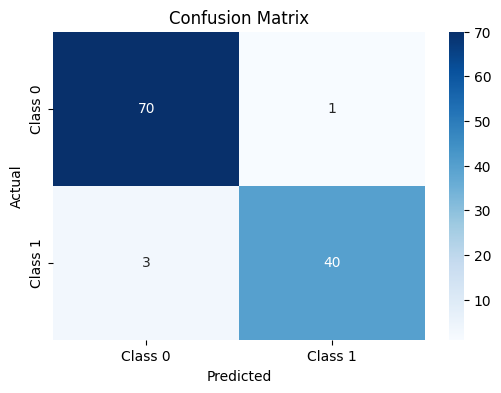

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [81]:
# Analyze the model with additional metrics
from sklearn.metrics import classification_report, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Can the model be improved?

Try changing the threshold of point-biserial correlation to increase or reduce the number of features that are used to make a prediction.

### Accuracy
* correlation at least 0.2: 0.947
* correlation at least 0.3: 0.956
* correlation at least 0.4: 0.965
* correlation at least 0.5: 0.929

The model performs best with a correlation of at least 0.4

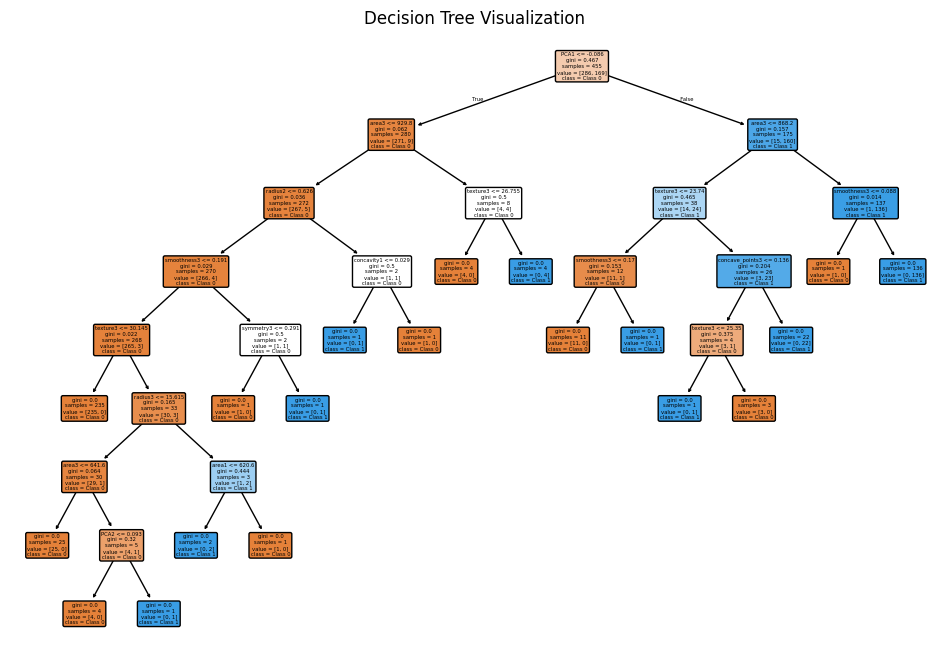

In [82]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names=['Class 0', 'Class 1'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()
